In [1]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to C:\Users\Van
[nltk_data]     Cloui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Van
[nltk_data]     Cloui\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

import praw
import pandas as pd
import datetime as dt

pd.options.display.max_columns = None
pd.options.display.width = None


reddit = praw.Reddit(client_id='gP1ZDwru6lQ7_Q', \
                     client_secret='HkdorTFcvI75e63hrHAo1ogjNtNriQ', \
                     user_agent='Scraping', \
                     username='hyperamper666', \
                     password='Jebemtiboga666')

subreddit = reddit.subreddit('wallstreetbets')

# .hot, .new, .controversial, .top, and .gilded. You can also use .search("SEARCH_KEYWORDS")


gains_list = subreddit.new(limit=800)

gains_dict = { "title":[], \
                "score":[], \
                "id":[], "url":[], \
                "comms_num": [], \
                "created": [], \
                "body":[]}

for submission in gains_list:
    gains_dict["title"].append(submission.title)
    gains_dict["score"].append(submission.score)
    gains_dict["id"].append(submission.id)
    gains_dict["url"].append(submission.url)
    gains_dict["comms_num"].append(submission.num_comments)
    gains_dict["created"].append(submission.created)
    gains_dict["body"].append(submission.selftext)



gains_data = pd.DataFrame(gains_dict)

def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = gains_data["created"].apply(get_date)
gains_data = gains_data.assign(timestamp = _timestamp)

Title = gains_data["title"]

Title

all_sentences = []

for word in Title:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


# print(lines)


Version 7.4.0 of praw is outdated. Version 7.5.0 was released Sunday November 14, 2021.


In [3]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [4]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
# stem

In [5]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

# stem2

In [6]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [7]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 1261, 2: 337, 3: 173, 4: 77, 5: 47, 6: 39, 7: 33, 8: 23, 10: 11, 9: 10, ...})

In [8]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

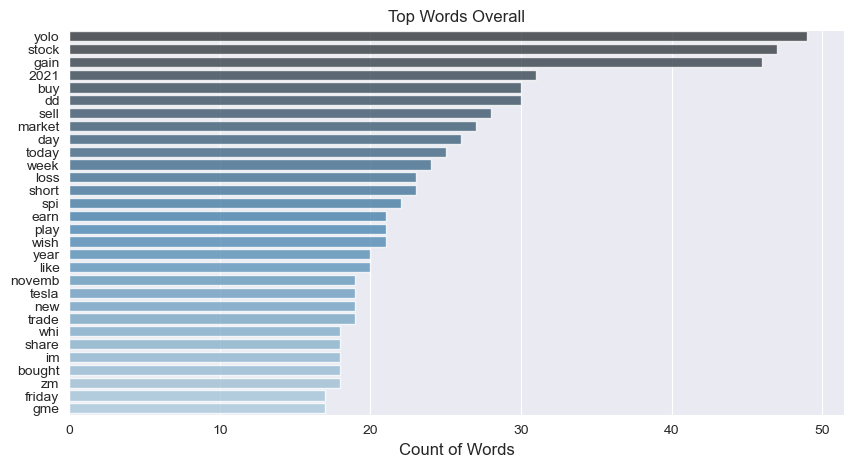

In [9]:
df = df[:30,]
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8,  palette="Blues_d")
plt.title('Top Words Overall')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [10]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_lg
nlp = en_core_web_lg.load()

In [11]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [12]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

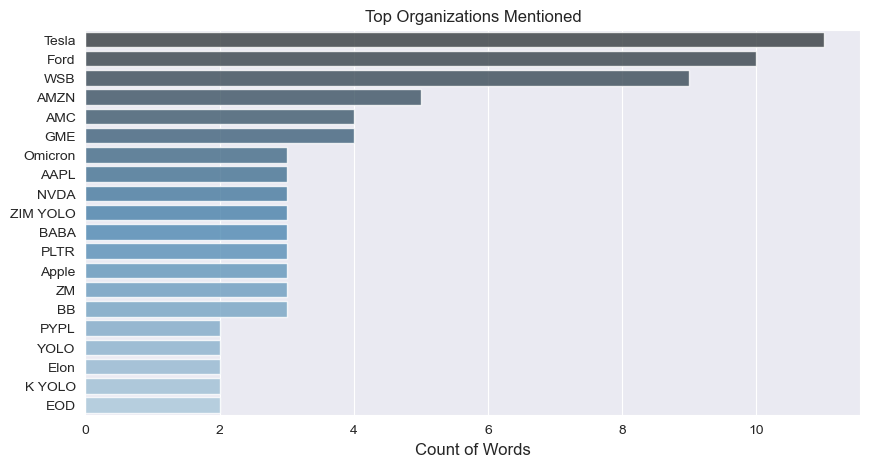

In [13]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8,  palette="Blues_d")

plt.title('Top Organizations Mentioned')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [14]:

str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

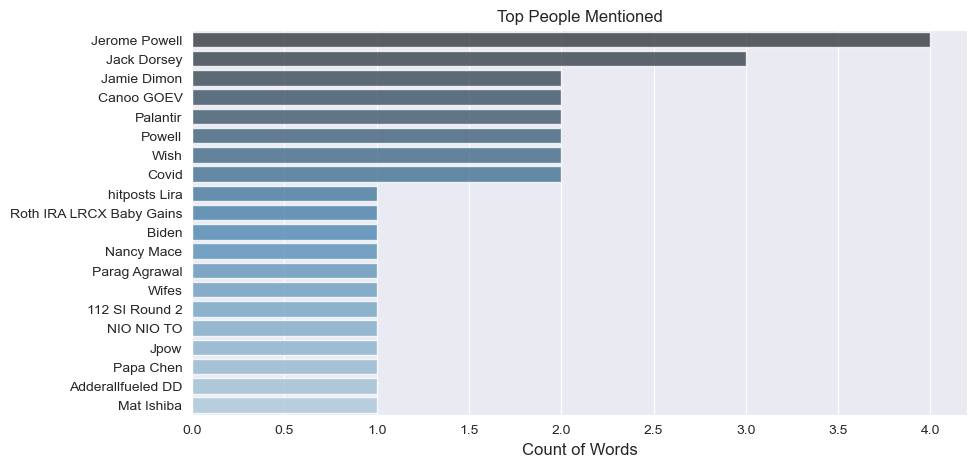

In [15]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8,  palette="Blues_d")
plt.title('Top People Mentioned')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()


In [16]:
gains_data



,title,score,id,url,comms_num,created,body,timestamp
0,"I tried to learn how to day trade, I think I d...",68,r5bcfq,https://i.redd.it/il4c4atrzm281.jpg,51,1.638236e+09,,2021-11-30 01:37:00
1,Sony's Spiderman:No Way Home crashes movie tic...,3,r5bb8v,https://www.reddit.com/r/wallstreetbets/commen...,10,1.638236e+09,This is going to benefit both AMC and Sony. \n...,2021-11-30 01:35:21
2,Big if true Jack Dorsey steps down from twitte...,0,r5axlc,https://www.reddit.com/r/CryptoMarkets/comment...,21,1.638235e+09,,2021-11-30 01:16:13
3,Biggest gamble in my life,8,r5asmg,https://www.reddit.com/gallery/r5asmg,8,1.638235e+09,,2021-11-30 01:09:17
4,AAPL Calls 🚀🚀,49,r5aom4,https://www.reddit.com/gallery/r5aom4,19,1.638234e+09,,2021-11-30 01:03:39
...,...,...,...,...,...,...,...,...
795,Democratic divide puts congressional action on...,16,qwy1vv,https://www.washingtonpost.com/politics/mariju...,36,1.637265e+09,,2021-11-18 19:53:48
796,Am I doing this right? $SAVA,32,qwxsdn,https://i.redd.it/bjuxfjqeqe081.jpg,30,1.637264e+09,,2021-11-18 19:41:31
797,$UPS is extremely undervalued.,7,qwxp6u,https://www.reddit.com/r/wallstreetbets/commen...,31,1.637264e+09,What does 90% of America have in common? We al...,2021-11-18 19:37:26
798,How to find total losses (so far) on RH for th...,8,qwxnaq,https://www.reddit.com/r/wallstreetbets/commen...,18,1.637264e+09,"As of today and yesterday, I’ve got some Clov ...",2021-11-18 19:35:05


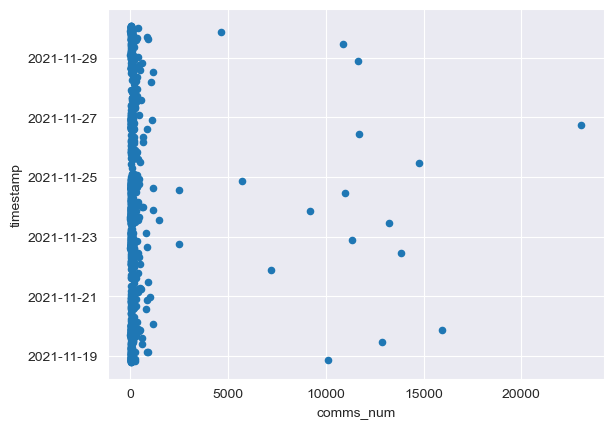

In [17]:

gains_data.plot.scatter(x= "comms_num", y = "timestamp")
# pd.set_option('max_columns', None)

# gains_data.iloc[332]
# gains_data.iloc[253]